# Linear and Logistical Regression Assignment
*Name:* Zach Novak

*PID:* za659148

*Date:* 3/2/2025


## Part One
For this part of the assignment, you will be using a linear regression model on a built-in financial dataset in python within Jupyter Notebook.

Scenario: Predicting the stock market index (S&P 500) based on historical financial indicators. You will use Yahoo Finance to fetch financial data, pandas for data handling, and scikit-learn for machine learning.

Steps:
- fetch S&P 500 and 10-year Treasury Yield data.
- define Treasury Yield as the independent variable (X) and S&P 500 Close as the dependent variable (y).
- train a Linear Regression Model to predict S&P 500 Close based on Treasury Yield.
- evaluate the model with Mean Absolute Error (MAE) and R^2 Score.

Reference Dataset: https://pypi.org/project/yfinance/#files

You can select the dates as the following for the both parts:

start="2020-01-01", end="2024-01-01"


In [23]:
# import modules
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


### Step 1: Fetch financial data from Yahoo Finance: S&P500 and Treasury

In [24]:
# define the ticker symbol
sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-01-01')
sp500.columns

[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [25]:
# define the ticker symbol
treasury = yf.download('^TNX', start='2020-01-01', end='2024-01-01')
treasury.columns

[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', '^TNX'),
            (  'High', '^TNX'),
            (   'Low', '^TNX'),
            (  'Open', '^TNX'),
            ('Volume', '^TNX')],
           names=['Price', 'Ticker'])

### Step 2: Data preprocessing using the method .dropna()

In [26]:
# number of rows before dropping NaN values
rows_before_sp500 = sp500.shape[0]
rows_before_treasury = treasury.shape[0]

# apply dropna() method
sp500 = sp500.dropna()
treasury = treasury.dropna()

# number of rows after dropping NaN values
rows_after_sp500 = sp500.shape[0]
rows_after_treasury = treasury.shape[0]

print(f"Rows in sp500 before dropping NaN values: {rows_before_sp500}")
print(f"Rows in sp500 after dropping NaN values: {rows_after_sp500}")
print(f"Rows in treasury before dropping NaN values: {rows_before_treasury}")
print(f"Rows in treasury after dropping NaN values: {rows_after_treasury}")


Rows in sp500 before dropping NaN values: 1006
Rows in sp500 after dropping NaN values: 1006
Rows in treasury before dropping NaN values: 1006
Rows in treasury after dropping NaN values: 1006


### Step 3: Define features (X) and target (y) 

In [27]:
# extracting the Close prices from both dataframes
# reshape is needed to convert the series into a 2D array as required by scikit-learn
X = treasury[('Close', '^TNX')].values.reshape(-1, 1)  # feature (independent variable)| Treasury Yield
y = sp500[('Close', '^GSPC')].values  # target (dependent variable)| S&P 500 Close

# show shapes to confirm
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1006, 1)
y shape: (1006,)


### Step 4: Split data into training (80%) and testing (20%) sets

In [28]:
# split the data into features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (804, 1)
X_test shape: (202, 1)
y_train shape: (804,)
y_test shape: (202,)


### Step 5: Train the Linear Regression Model

In [29]:
# create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 6: Calculate the Predictions

In [30]:
# make predictions on the test set
y_pred = model.predict(X_test)

### Step 7: Evaluate the Model - Calculate the MAE and R-squared.
### Step 8: Print Model Performance values - MAE, r2, slope and intercept.

In [31]:
# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print model results
print(f"Linear Regression Model Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")

Linear Regression Model Results:
Mean Absolute Error (MAE): 371.40
R-squared Score: 0.2190
Model Coefficient: 192.96
Model Intercept: 3516.63


### Step 9: Plot results

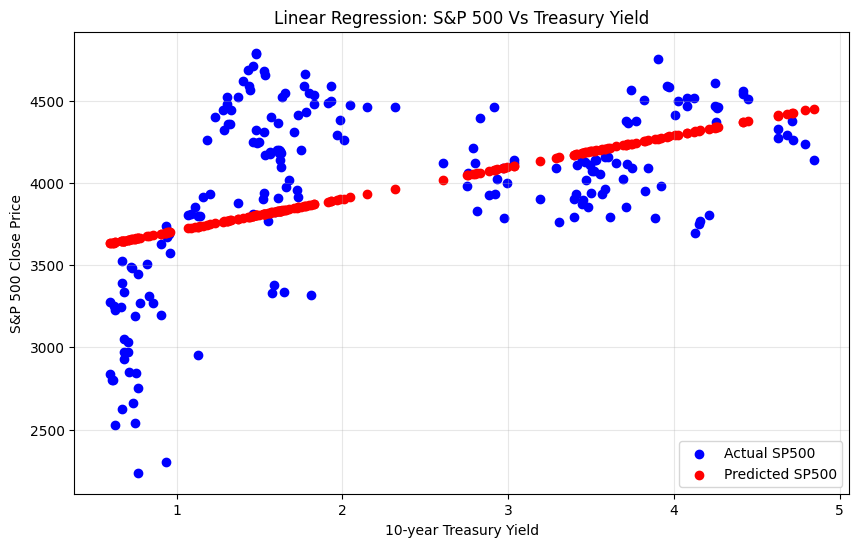

In [32]:
# create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual SP500')
plt.scatter(X_test, y_pred, color='red', label='Predicted SP500')

# add labels and title
plt.xlabel('10-year Treasury Yield')
plt.ylabel('S&P 500 Close Price')
plt.title('Linear Regression: S&P 500 Vs Treasury Yield')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Q: What is your interpretation based on the R-squared and MAE values?

A: The R squared value of 0.2190 means about 22% of the variance of the SP500 price is due to the 10-year Treasury Yield. This is nothing to scoff at, but still leaves 78% of the variability unaccounted for.

The model's predictions deviate from the actual values by about $371 dollars. This is about the normal size of the prediction errors.

## Part Two

Logistic Regression in Finance: Predicting Stock Market Movement

Scenario: You will use Logistic Regression to predict whether the S&P500 index will go up or down based on financial indicators.

Target Variable: Market Direction (1 = Up, 0 = Down)

Predictors: Treasury Yield, Moving Averages, and S&P500 Volatility

### Step 1: Download financial data (S&P 500 and Treasury Yield)

In [33]:
# validate sp500 columns
sp500.columns

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [34]:
# validate treasury columns
treasury.columns

MultiIndex([( 'Close', '^TNX'),
            (  'High', '^TNX'),
            (   'Low', '^TNX'),
            (  'Open', '^TNX'),
            ('Volume', '^TNX')],
           names=['Price', 'Ticker'])

### Step 2: Feature Engineering
Find out the following for SP500:
- Daily_Return
- Market_Direction: 1 is up, 0 is down.
- 50_MA: 50-day moving average
- Volatility: 20-day rolling volatility

In [35]:
# calculate daily returns for S&P 500
sp500[('Daily_Return', '^GSPC')] = sp500[('Close', '^GSPC')].pct_change()
# create a binary indicator for market direction (1 = up, 0 = down)
sp500[('Market_Direction', '^GSPC')] = (sp500[('Daily_Return', '^GSPC')] > 0).astype(int)

# calculate the 50-day moving average for S&P 500
sp500[('50_MA', '^GSPC')] = sp500[('Close', '^GSPC')].rolling(window=50).mean()

# calculate the 20-day rolling volatility (standard deviation of daily returns)
sp500[('Volatility', '^GSPC')] = sp500[('Daily_Return', '^GSPC')].rolling(window=20).std()

# display the last few rows of the dataframe to check the new features
sp500[[('Close', '^GSPC'), ('Daily_Return', '^GSPC'), 
    ('Market_Direction', '^GSPC'), ('50_MA', '^GSPC'), 
    ('Volatility', '^GSPC')]].tail()


Price,Close,Daily_Return,Market_Direction,50_MA,Volatility
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-12-22,4754.629883,0.001660,1,4468.218584,0.006067
2023-12-26,4774.750000,0.004232,1,4477.157988,0.006006
2023-12-27,4781.580078,0.001430,1,4485.316992,0.006001
2023-12-28,4783.350098,0.000370,1,4493.519990,0.005969
2023-12-29,4769.830078,-0.002826,0,4502.624590,0.006077


In [36]:
# display the number of rows before dropping NaN values
print(f"Rows in sp500 before dropping NaN values: {sp500.shape[0]}")

# drop NaN values created by rolling calculations
sp500 = sp500.dropna()

# display the number of rows after dropping NaN values
print(f"Rows in sp500 after dropping NaN values: {sp500.shape[0]}")

Rows in sp500 before dropping NaN values: 1006
Rows in sp500 after dropping NaN values: 957


In [37]:
# merge the Treasury Yield data with S&P 500 data
# use the date as the index to join the datasets
merged_df = pd.merge(
    sp500, 
    treasury[('Close', '^TNX')], 
    left_index=True, 
    right_index=True
)

# create a DataFrame for our logistic regression
logistic_data = pd.DataFrame({
    'Treasury_Yield': merged_df[('Close', '^TNX')],
    '50_MA': merged_df[('50_MA', '^GSPC')],
    'Volatility': merged_df[('Volatility', '^GSPC')],
    'Market_Direction': merged_df[('Market_Direction', '^GSPC')]
})

# check for any missing values after merging
print(f"Shape of merged data: {logistic_data.shape}")
print(f"Missing values:\n{logistic_data.isnull().sum()}")

# display the first few rows of the merged dataset
logistic_data.head()

Shape of merged data: (957, 4)
Missing values:
Treasury_Yield      0
50_MA               0
Volatility          0
Market_Direction    0
dtype: int64


,Treasury_Yield,50_MA,Volatility,Market_Direction
Date,,,,
2020-03-13,0.951,3197.861792,0.043920,1
2020-03-16,0.728,3180.427388,0.050181,0
2020-03-17,0.997,3166.314185,0.052940,1
2020-03-18,1.266,3149.350586,0.053458,0
2020-03-19,1.119,3132.794785,0.053591,1


In [38]:
# define the features (X) and target (y) for the logistic regression model
X = logistic_data.drop(columns='Market_Direction')
y = logistic_data['Market_Direction']

# show shapes to confirm
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (957, 3)
y shape: (957,)


### Step 3: Train-Test Split (80%-20%)

In [39]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show the shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (765, 3)
X_test shape: (192, 3)
y_train shape: (765,)
y_test shape: (192,)


### Step 4: Standardize Features

In [40]:
# scale the data
scaler = StandardScaler()

# fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 5: Train the Logistic Regression Model

In [41]:
# create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

### Step 6: Calculate the Predictions

In [42]:
# make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

print(y_pred)

[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1]


### Step 7: Evaluate the Model Performance - accuracy, confusion matrix, classification report

In [43]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Logistic Regression Model Results:")
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_rep)

Logistic Regression Model Results:
Model Accuracy: 0.5521

Confusion Matrix:
[[18 70]
 [16 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.20      0.30        88
           1       0.56      0.85      0.67       104

    accuracy                           0.55       192
   macro avg       0.54      0.53      0.48       192
weighted avg       0.54      0.55      0.50       192



### Step 8: Plot Confusion Matrix

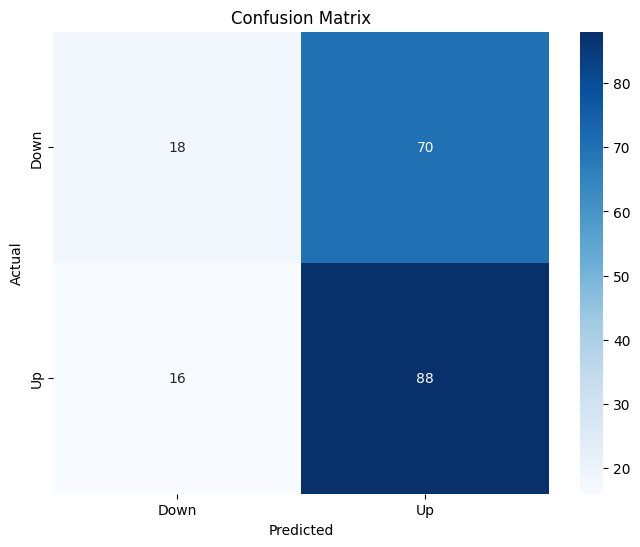

In [44]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Q: What is your interpretation based on the Confusion Matrix?

A: The confusion matrix helps us understand how the effective the model training was during test predictions. We can see when the model was wrong, it was more often a case of the market went down when predicted to go up. The model is slightly better meaning more biased at predicting upward movement. With a model accuracy of about 55%, this can support our findings.